## Data manipulation

Code to compute, export and plot both energy and operational carbon footprint datasets

In [1]:
# Importing packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pyarrow
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.seasonal import STL

In [2]:
# PWR DATASET
dataset_P = pd.read_csv('../PowerDataset_3_years.csv', index_col=0, parse_dates=True)

dataset_P.index = pd.to_datetime(dataset_P.index).tz_localize(None) # To remove the localization in the datetime format

dataset_P

,r205n01,r205n02,r205n03,r205n04,r205n05,r205n06,r205n07,r205n08,r205n09,r205n10,...,r256n11,r256n12,r256n13,r256n14,r256n15,r256n16,r256n17,r256n18,r256n19,r256n20
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-05-02 17:00:00,530.882353,20.000000,529.444444,550.606061,577.948718,528.611111,568.571429,669.487179,574.857143,547.297297,...,512.000000,525.294118,530.294118,527.837838,521.142857,530.285714,526.756757,561.315789,539.705882,526.000000
2020-05-02 18:00:00,532.025641,20.000000,529.042791,548.348292,575.650935,527.948171,571.401899,667.741604,573.162629,546.831131,...,511.356838,527.112341,530.396878,527.295592,520.331584,530.313347,527.160159,562.404254,539.750465,524.765520
2020-05-02 19:00:00,541.962608,20.000000,532.534305,554.683586,581.220896,527.629587,571.127541,670.140471,573.512427,547.244151,...,511.393428,525.655454,530.244126,528.170642,520.270270,530.186054,525.208819,560.954731,537.384654,525.631471
2020-05-02 20:00:00,544.268327,20.000000,532.654562,557.141766,586.214043,529.118962,571.603887,674.412953,576.784291,547.738046,...,511.756579,527.205914,530.569659,527.977996,520.715861,530.500481,524.167448,560.610850,537.646236,525.149199
2020-05-02 21:00:00,542.883504,20.000000,533.145359,556.479451,587.117900,528.839406,572.772164,675.122225,576.477301,548.337485,...,512.915703,529.027778,530.596706,529.074976,522.041521,530.186054,527.420255,563.308303,539.427887,525.096847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-28 18:00:00,532.969697,541.555556,526.484848,550.388889,576.042929,520.782828,571.000000,549.944444,566.535354,535.333333,...,1204.111111,841.996212,1155.944444,1583.000000,869.055556,1193.555556,779.055556,745.944444,1196.444444,1255.888889
2022-09-28 19:00:00,533.333333,541.111111,527.333333,550.611111,577.055556,520.333333,567.500000,549.333333,567.055556,536.277778,...,1205.000000,703.944444,1173.000000,1593.166667,868.833333,1196.000000,670.000000,635.777778,1201.000000,1251.611111
2022-09-28 20:00:00,532.555556,541.277778,526.555556,548.944444,575.722222,520.888889,570.000000,550.444444,566.166667,535.611111,...,1203.944444,863.444444,1175.166667,1587.444444,708.833333,1195.555556,610.888889,902.000000,1195.222222,1245.722222


In [3]:
# CI DATASET
dataset_CI = pd.read_csv('../CI_Dataset.csv', index_col=0, parse_dates=True)

dataset_CI

,Carbon Intensity gCO₂eq/kWh (direct),Carbon Intensity gCO₂eq/kWh (LCA),Low Carbon Percentage,Renewable Percentage,LCA+direct
timestamp,,,,,
2021-01-01 00:00:00,303.29,389.74,35.12,30.82,693.03
2021-01-01 01:00:00,303.45,387.76,36.15,33.12,691.21
2021-01-01 02:00:00,295.04,377.86,37.89,33.65,672.90
2021-01-01 03:00:00,295.56,380.36,37.14,32.05,675.92
2021-01-01 04:00:00,308.06,394.66,34.50,31.71,702.72
...,...,...,...,...,...
2023-12-31 19:00:00,260.51,333.72,46.38,36.24,594.23
2023-12-31 20:00:00,265.88,342.93,43.68,32.08,608.81
2023-12-31 21:00:00,250.60,324.02,47.82,32.64,574.62


In [4]:
# Energy computation
dataset_E = dataset_P / 1000 # this way we get energy values in kWh (*1 /1000)

dataset_E

,r205n01,r205n02,r205n03,r205n04,r205n05,r205n06,r205n07,r205n08,r205n09,r205n10,...,r256n11,r256n12,r256n13,r256n14,r256n15,r256n16,r256n17,r256n18,r256n19,r256n20
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-05-02 17:00:00,0.530882,0.020000,0.529444,0.550606,0.577949,0.528611,0.568571,0.669487,0.574857,0.547297,...,0.512000,0.525294,0.530294,0.527838,0.521143,0.530286,0.526757,0.561316,0.539706,0.526000
2020-05-02 18:00:00,0.532026,0.020000,0.529043,0.548348,0.575651,0.527948,0.571402,0.667742,0.573163,0.546831,...,0.511357,0.527112,0.530397,0.527296,0.520332,0.530313,0.527160,0.562404,0.539750,0.524766
2020-05-02 19:00:00,0.541963,0.020000,0.532534,0.554684,0.581221,0.527630,0.571128,0.670140,0.573512,0.547244,...,0.511393,0.525655,0.530244,0.528171,0.520270,0.530186,0.525209,0.560955,0.537385,0.525631
2020-05-02 20:00:00,0.544268,0.020000,0.532655,0.557142,0.586214,0.529119,0.571604,0.674413,0.576784,0.547738,...,0.511757,0.527206,0.530570,0.527978,0.520716,0.530500,0.524167,0.560611,0.537646,0.525149
2020-05-02 21:00:00,0.542884,0.020000,0.533145,0.556479,0.587118,0.528839,0.572772,0.675122,0.576477,0.548337,...,0.512916,0.529028,0.530597,0.529075,0.522042,0.530186,0.527420,0.563308,0.539428,0.525097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-28 18:00:00,0.532970,0.541556,0.526485,0.550389,0.576043,0.520783,0.571000,0.549944,0.566535,0.535333,...,1.204111,0.841996,1.155944,1.583000,0.869056,1.193556,0.779056,0.745944,1.196444,1.255889
2022-09-28 19:00:00,0.533333,0.541111,0.527333,0.550611,0.577056,0.520333,0.567500,0.549333,0.567056,0.536278,...,1.205000,0.703944,1.173000,1.593167,0.868833,1.196000,0.670000,0.635778,1.201000,1.251611
2022-09-28 20:00:00,0.532556,0.541278,0.526556,0.548944,0.575722,0.520889,0.570000,0.550444,0.566167,0.535611,...,1.203944,0.863444,1.175167,1.587444,0.708833,1.195556,0.610889,0.902000,1.195222,1.245722


In [5]:
# Operational Carbon Footprint computation
# We need to get the same period of time from the energy and the carbon intensity datasets
start = pd.to_datetime('2021-01-01 00:00:00') 
end = pd.to_datetime('2022-09-28 22:00:00')

partial_dataset_E = dataset_E.loc[start:end]
partial_dataset_CI = dataset_CI.loc[start:end]

dataset_Cop = partial_dataset_E.mul(partial_dataset_CI['Carbon Intensity gCO₂eq/kWh (direct)'], axis=0) # gCO2

dataset_Cop 

,r205n01,r205n02,r205n03,r205n04,r205n05,r205n06,r205n07,r205n08,r205n09,r205n10,...,r256n11,r256n12,r256n13,r256n14,r256n15,r256n16,r256n17,r256n18,r256n19,r256n20
timestamp,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,145.360157,168.932530,161.080689,168.646089,178.503014,158.334229,174.206406,169.286368,175.857652,166.977994,...,229.910669,181.502216,194.274094,200.862227,179.581379,180.373303,231.629313,279.146278,246.878060,186.321157
2021-01-01 01:00:00,145.352550,169.004792,161.131950,167.656125,177.872275,158.333467,173.859992,169.089083,176.017858,166.256883,...,231.262617,181.732833,193.971983,201.153633,179.861558,180.013283,350.282450,279.865192,246.199100,185.677683
2021-01-01 02:00:00,141.242204,163.927502,156.453156,163.222684,173.090133,153.551929,169.303787,164.550364,171.139591,161.567182,...,226.000640,176.466702,187.399573,195.316480,174.483378,174.434204,335.673564,271.092587,238.966009,180.384178
2021-01-01 03:00:00,141.671760,164.823960,156.728900,163.871600,172.935440,154.348000,169.979840,165.070260,171.490480,162.886400,...,225.643640,176.843400,188.879260,195.315900,173.986320,174.971520,339.713380,270.486660,240.947080,180.734940
2021-01-01 04:00:00,147.560740,171.623649,163.562746,170.767927,180.403359,161.200952,176.809326,172.137082,178.845944,169.723946,...,278.862758,183.997392,194.574119,204.414924,182.303062,183.004754,355.689499,280.933606,187.300480,188.310232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-28 18:00:00,191.501342,194.586327,189.171271,197.760232,206.977985,187.122478,205.166010,197.600538,203.561818,192.350620,...,432.649163,302.537659,415.342398,568.787730,312.260352,428.856447,279.922452,268.025298,429.894453,451.253437
2022-09-28 19:00:00,200.128000,203.046533,197.876560,206.611313,216.534327,195.249880,212.948700,206.131840,212.781927,201.232873,...,452.164200,264.148113,440.156520,597.819860,326.021020,448.787040,251.410800,238.569253,450.663240,469.654553
2022-09-28 20:00:00,203.393618,206.724809,201.102098,209.652862,219.879831,198.937884,217.694400,210.225742,216.230373,204.560596,...,459.810462,329.766702,448.819653,606.276782,270.717627,456.606578,233.310684,344.491840,456.479271,475.766231


In [6]:
# Dataset exporting as a CSV file for later use
output_file = '../E_Dataset.csv'
dataset_E.to_csv(output_file, index_label='timestamp')

output_file = '../Cop_Dataset.csv'
dataset_Cop.to_csv(output_file, index_label='timestamp')

## Plotting

In [7]:
# Function that plots a specific node or set of nodes
def showplot(dataset_node, size, ylabel, title, label):
    plt.figure(figsize=size)
    plt.tight_layout() 
    plt.grid(True)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.plot(dataset_node, linewidth=2, label=label)
    plt.legend()
    plt.show

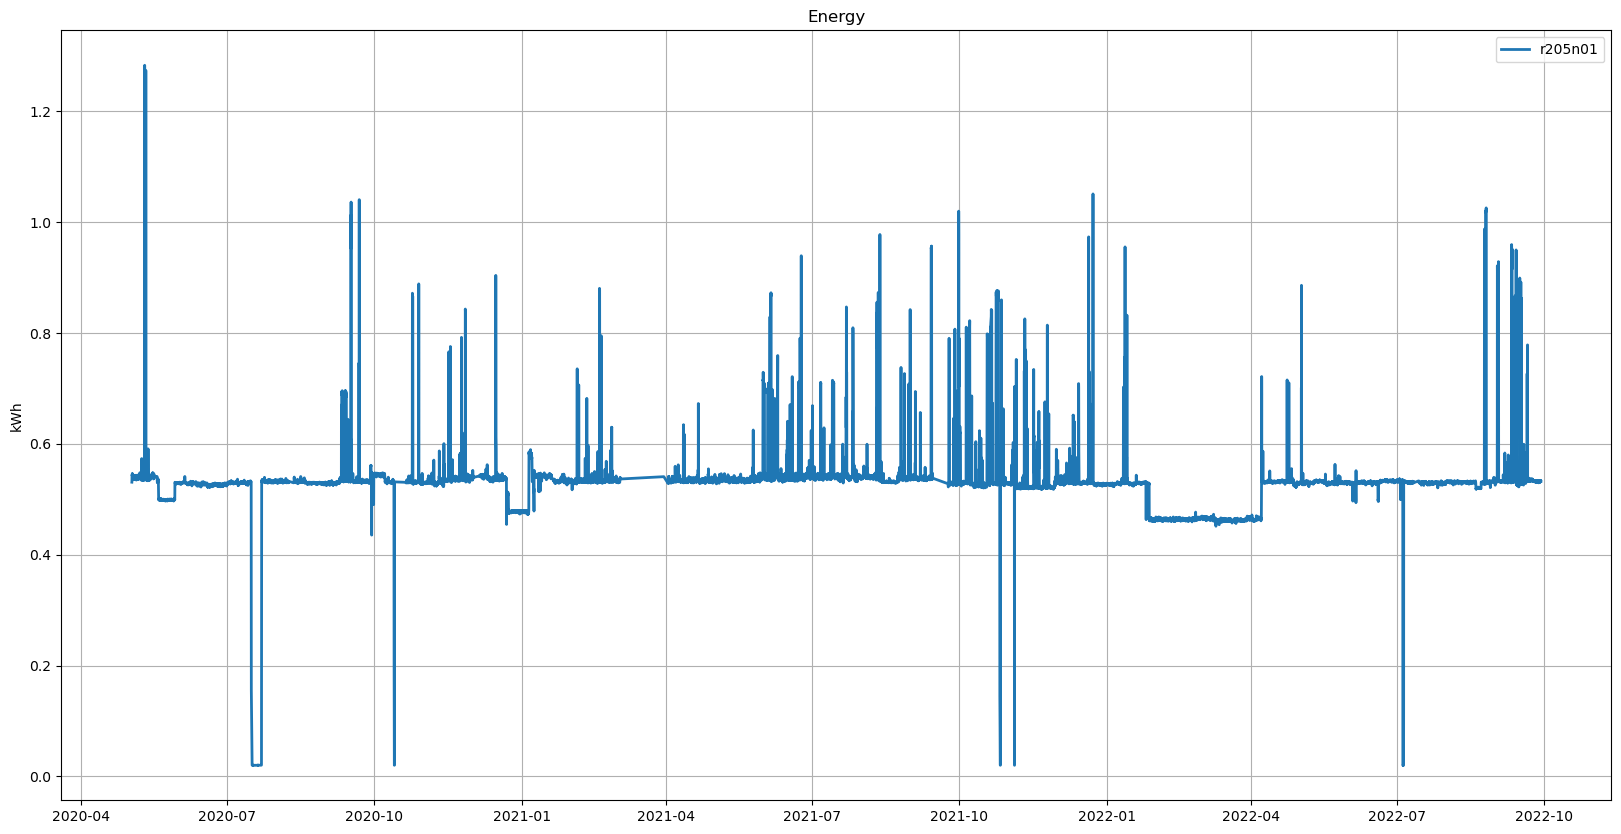

In [8]:
# Energy plotting
showplot(dataset_E['r205n01'], (20,10), 'kWh', 'Energy', dataset_E.columns[0]) # Specific node
#showplot(dataset_E.iloc[:, 0:5], (20,10), 'kWh', 'Energy', dataset_E.columns[0:5]) # Set of nodes

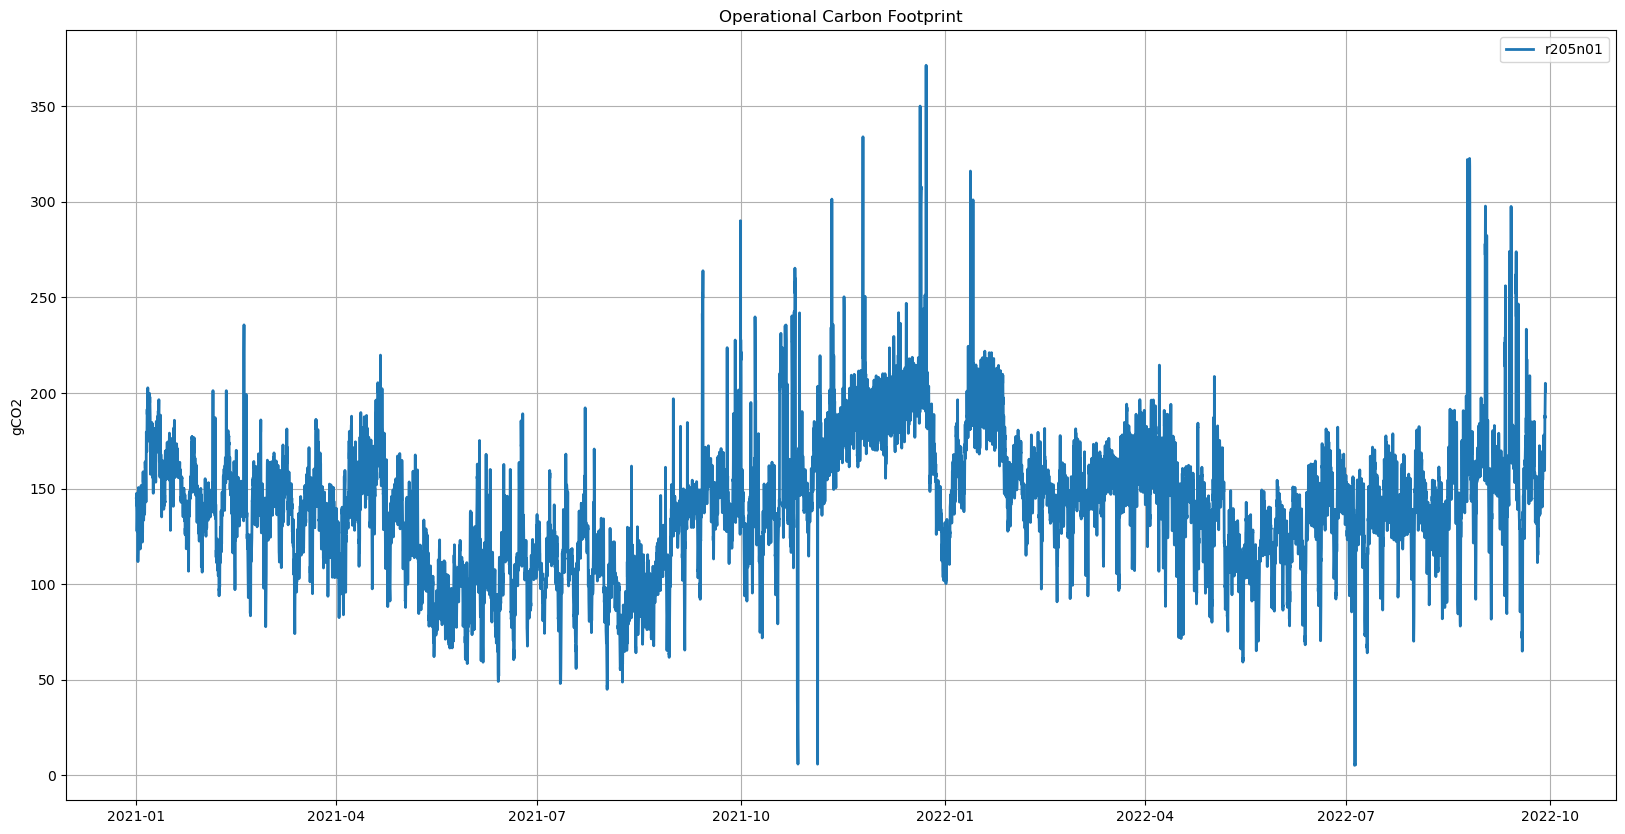

In [11]:
# Cop plotting
showplot(dataset_Cop['r205n01'], (20,10), 'gCO2', 'Operational Carbon Footprint', dataset_Cop.columns[0]) # Specific node
#showplot(dataset_Cop.iloc[:, 0:5], (20,10), 'gCO2', 'Operational Carbon Footprint', dataset_Cop.columns[0:5]) # Set of nodes

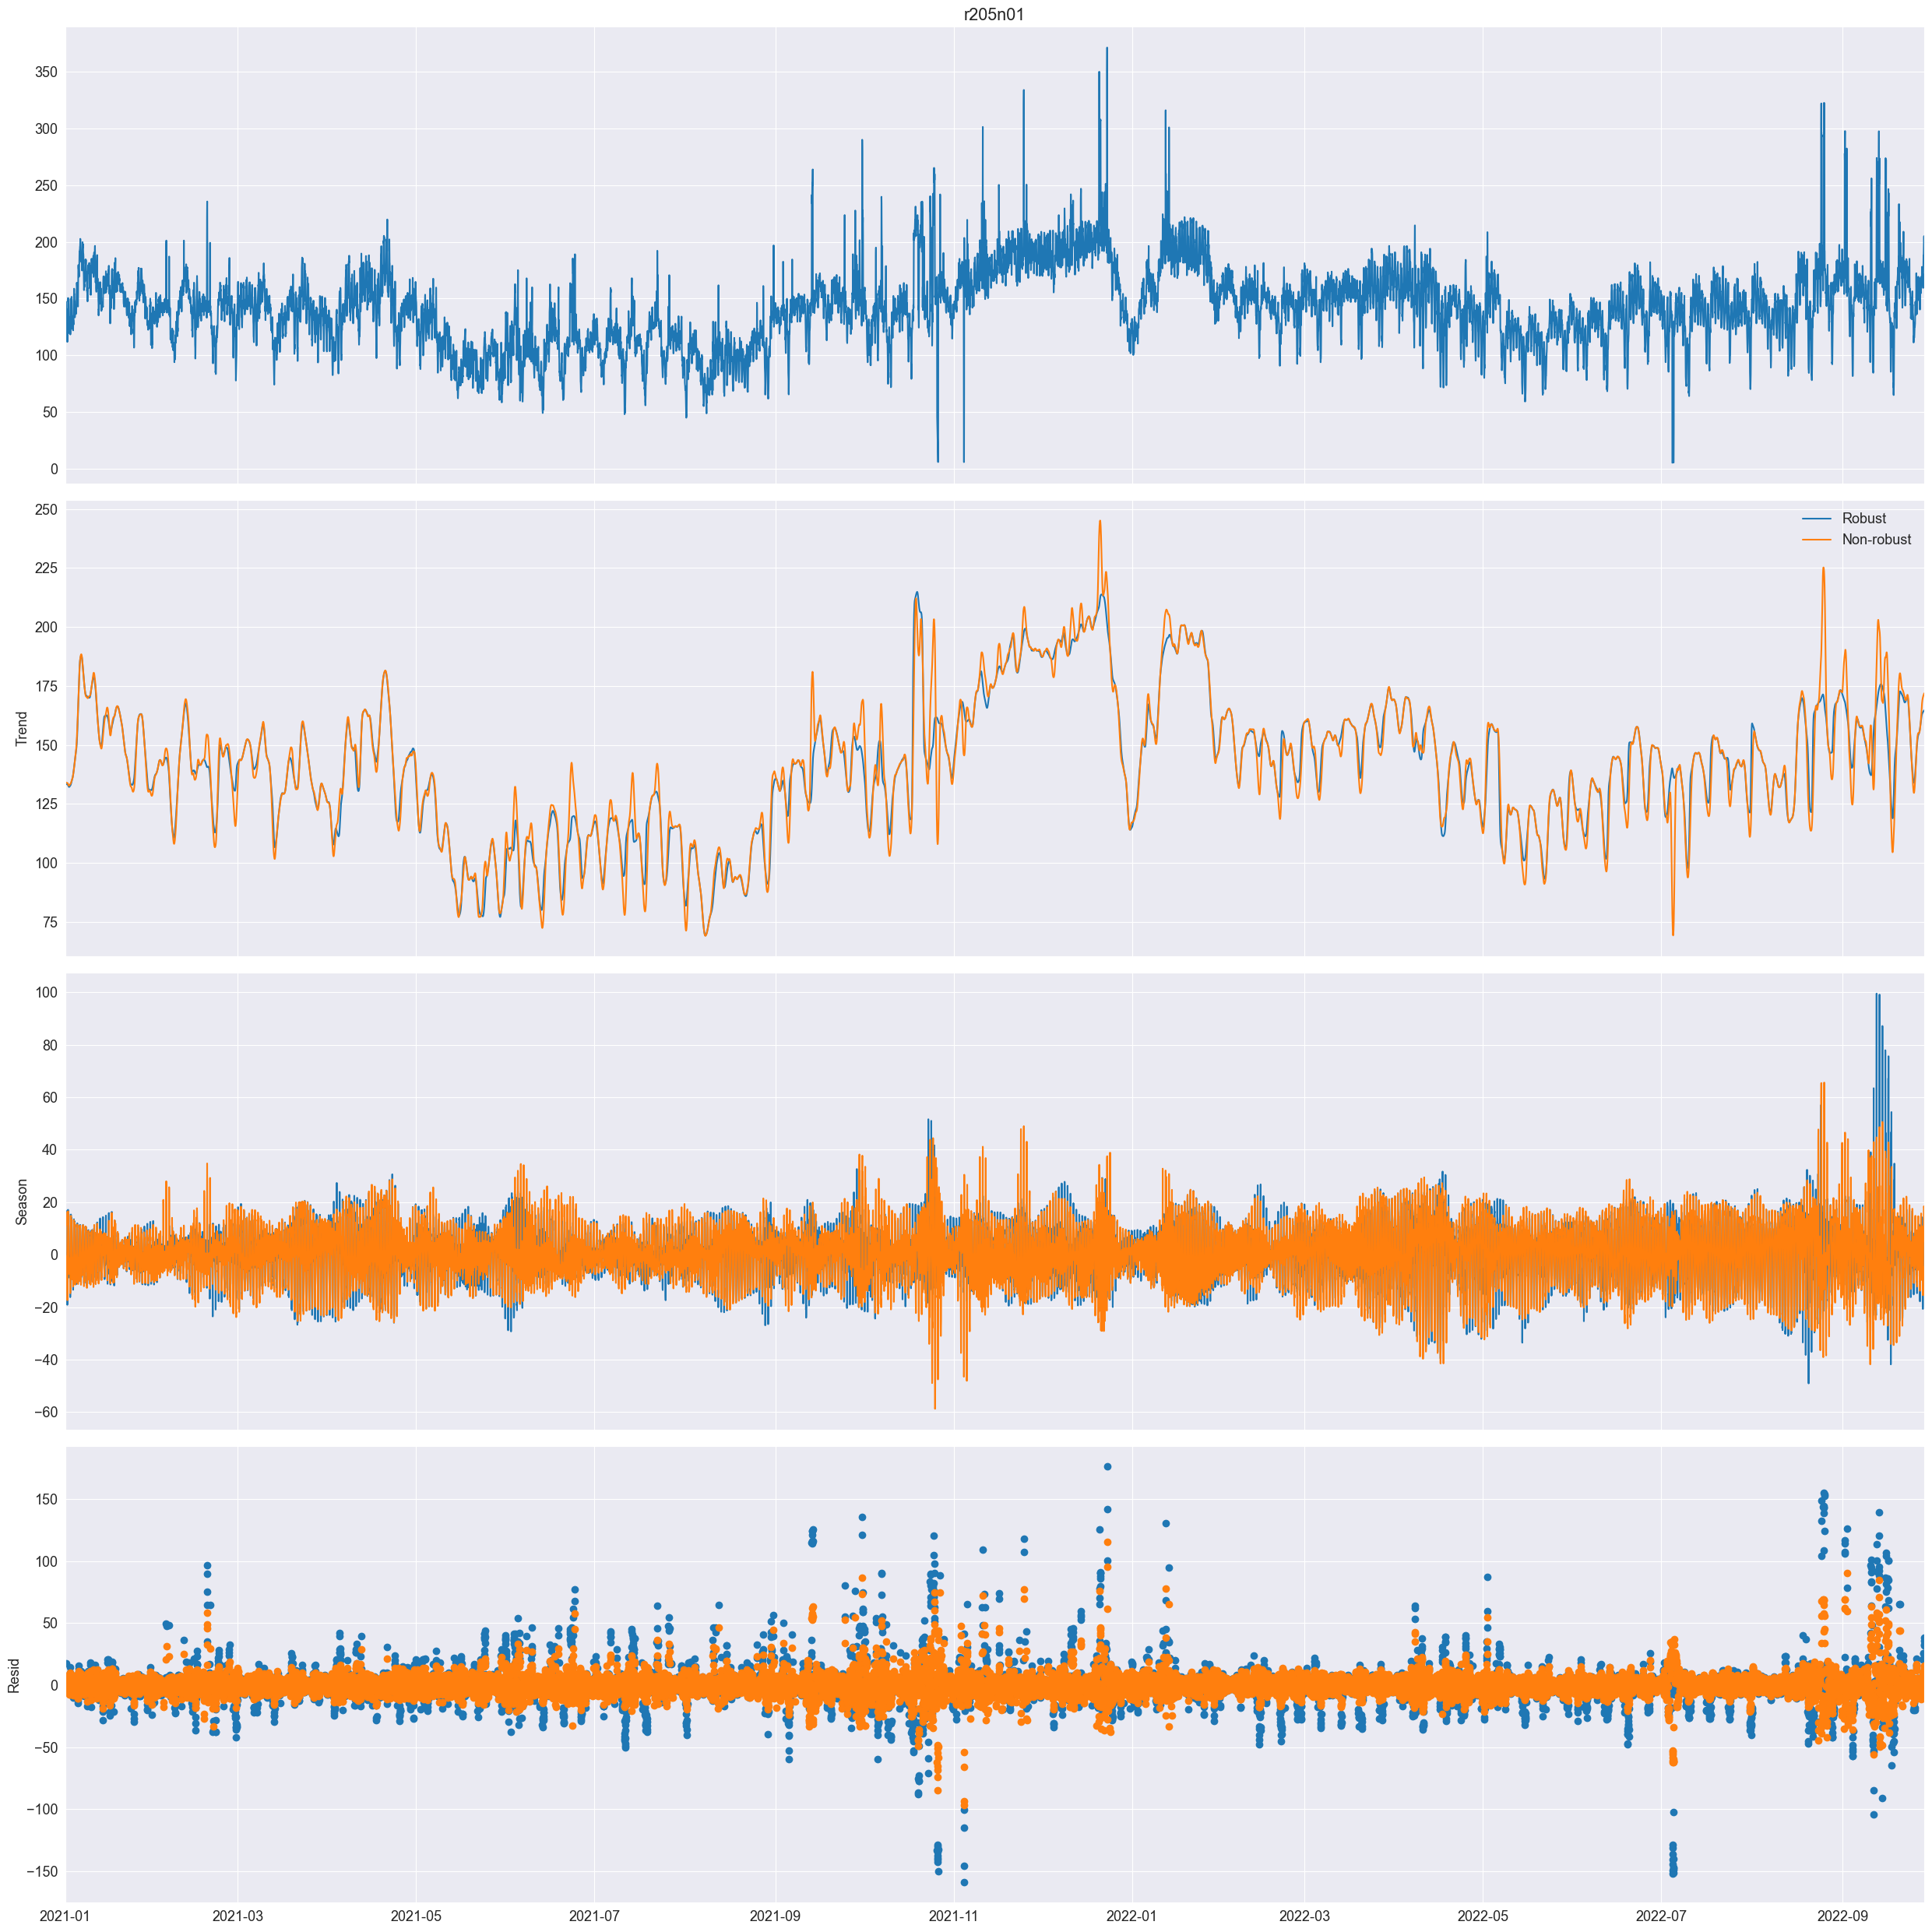

In [13]:
# Seasonal-Trend Decomposition for 2.5 years dataset
register_matplotlib_converters()
sns.set_style("darkgrid")

plt.rc("figure", figsize=(25, 25))
plt.rc("font", size=13)

def add_stl_plot(fig, res, legend):
    """Add 3 plots from a second STL fit"""
    axs = fig.get_axes()
    comps = ["trend", "seasonal", "resid"]
    for ax, comp in zip(axs[1:], comps):
        series = getattr(res, comp)
        if comp == "resid":
            ax.plot(series, marker="o", linestyle="none")
        else:
            ax.plot(series)
            if comp == "trend":
                ax.legend(legend, frameon=False)

stl = STL(dataset_Cop['r205n01'], period=24, robust=True)  # the period is set to one day
res_robust = stl.fit()
fig = res_robust.plot()
res_non_robust = STL(dataset_Cop['r205n01'], period=24, robust=False).fit()
add_stl_plot(fig, res_non_robust, ["Robust", "Non-robust"])

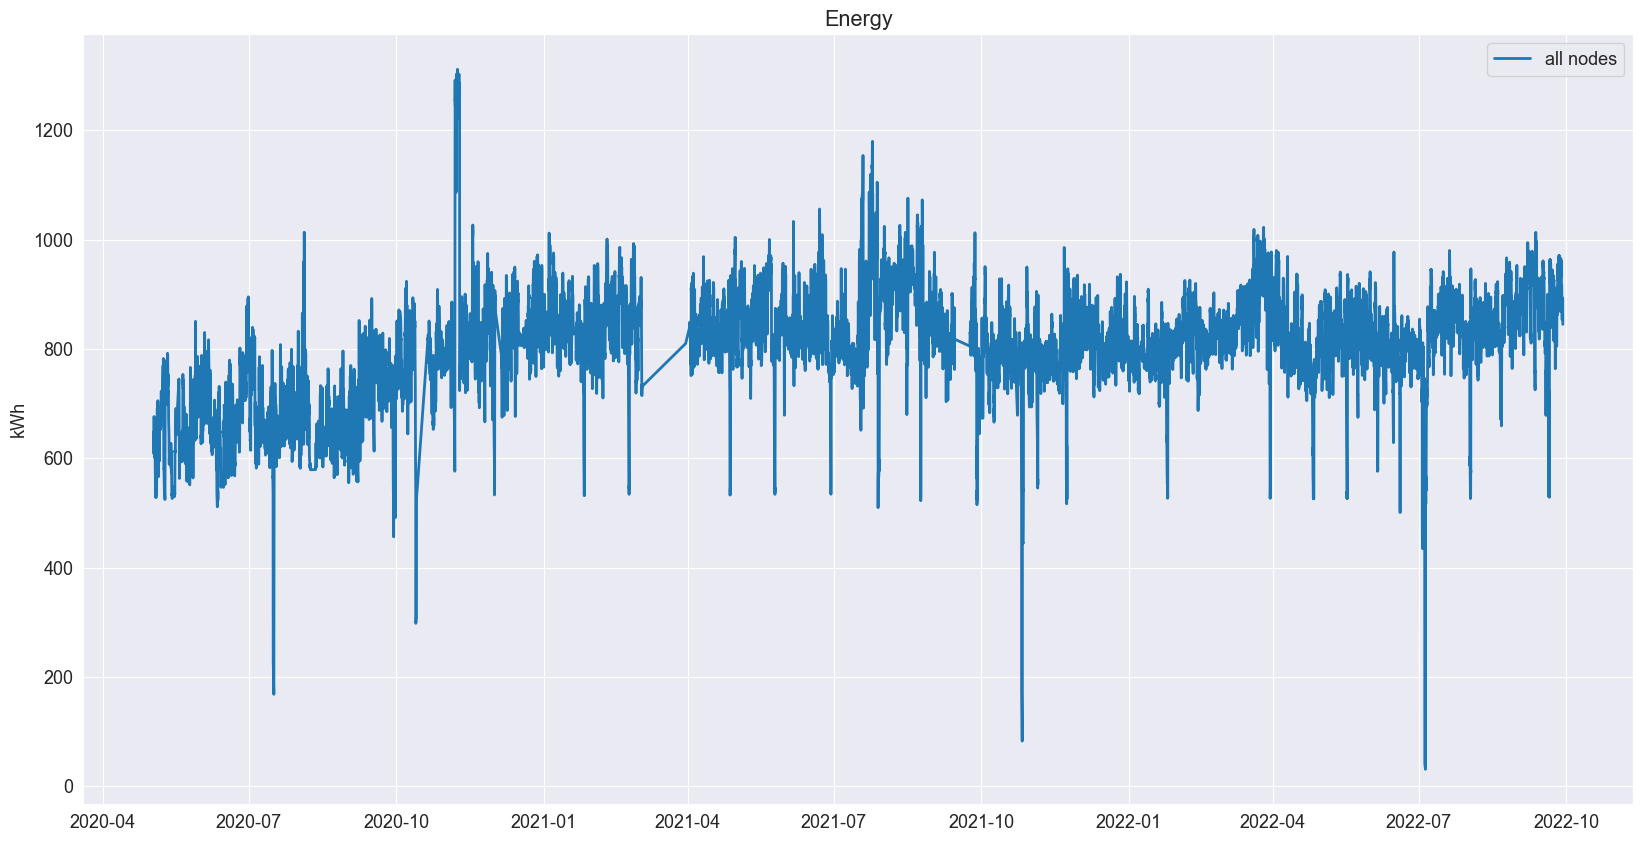

In [15]:
# In the end we want to plot the Energy of all nodes summed together
showplot(dataset_E.sum(axis=1), (20,10), 'kWh', 'Energy', 'all nodes')

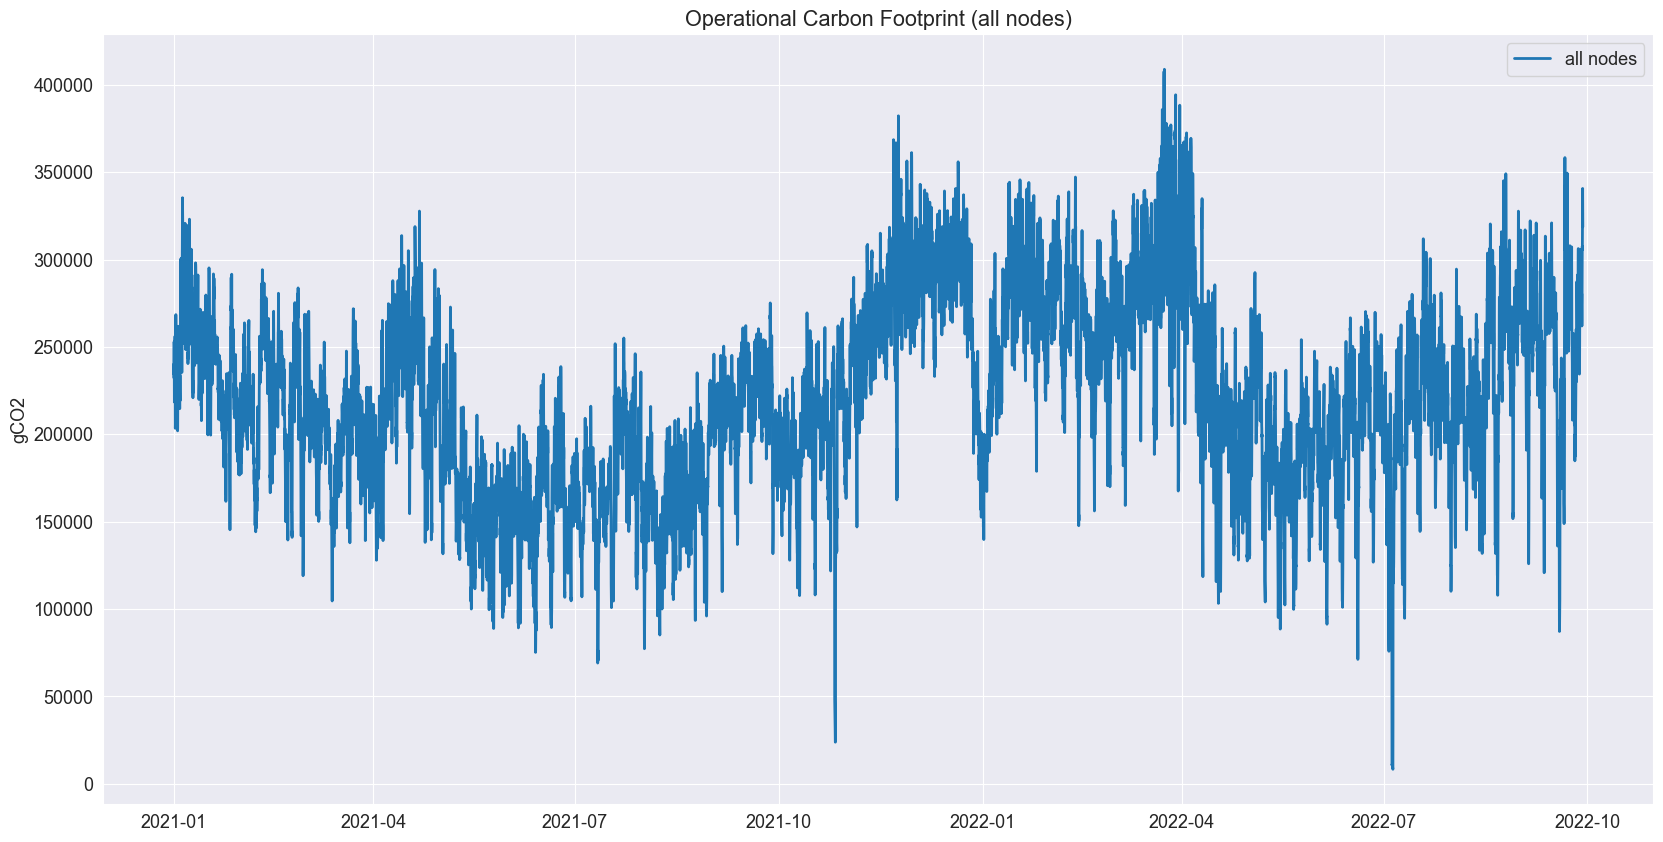

In [14]:
# In the end we want to plot the Cop of all nodes summed together
showplot(dataset_Cop.sum(axis=1), (20,10), 'gCO2', 'Operational Carbon Footprint (all nodes)', 'all nodes')